# Importaciones

In [ ]:
import copy as cp
import numpy as np
import plotly.graph_objects as go
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identificación

In [ ]:
csv_path = os.path.join("/content/drive/MyDrive/Datasets/netflix_titles.csv")
netflix = pd.read_csv(csv_path)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
valores_nulos_por_columna = netflix.isnull().sum()

columnas_con_nulos = valores_nulos_por_columna[valores_nulos_por_columna > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


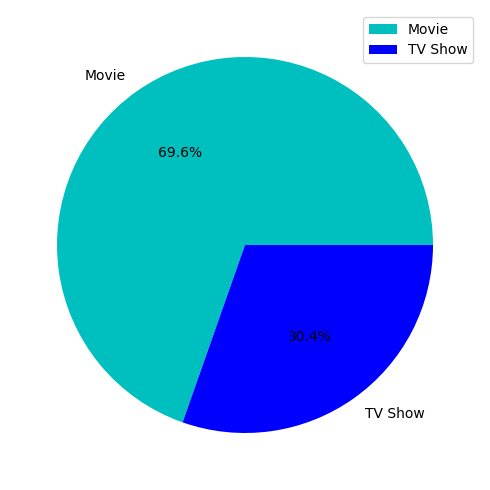

In [ ]:
type_show = netflix['type'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(type_show,
        labels= type_show.index ,
        autopct= '%1.1f%%' ,
        colors = ['c' , 'b'])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
netflix.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce', infer_datetime_format=True)


In [ ]:
genre_counts = netflix['listed_in'].value_counts()

print("Cantidad de Géneros:")
print(genre_counts)

Cantidad de Géneros:
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64


In [ ]:
netflix = netflix.dropna()
copiadf = cp.deepcopy(netflix)
copiadf = netflix[netflix['type'] == 'Movie']
copiadf['duration'] = copiadf['duration'].str.replace(' min', '').astype(int)

<ipython-input-11-b5e916f3f3cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copiadf['duration'] = copiadf['duration'].str.replace(' min', '').astype(int)


<ipython-input-12-9046bdf3e193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copiadf['genres'] = copiadf['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)


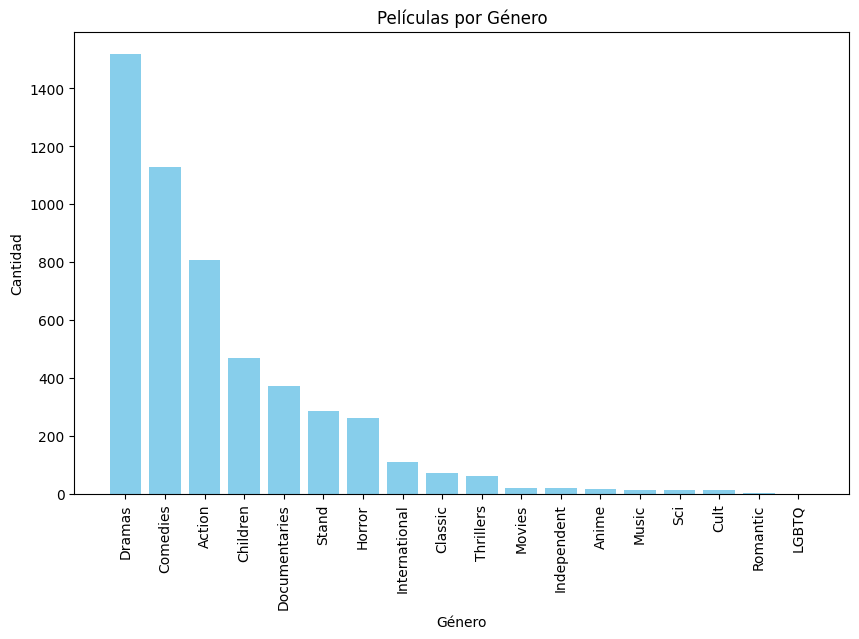

In [ ]:
copiadf['genres'] = copiadf['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

genre_counts_movie = copiadf['genres'].value_counts().reset_index()

genre_counts_movie.columns = ['genre', 'count']

plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Películas por Género')
plt.xticks(rotation=90)
plt.show()

In [ ]:
trace = go.Histogram(
    x=copiadf['duration'],
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly_dark",
    title='Distribución de la Duración de las Películas',
    xaxis=dict(title='Duración')
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

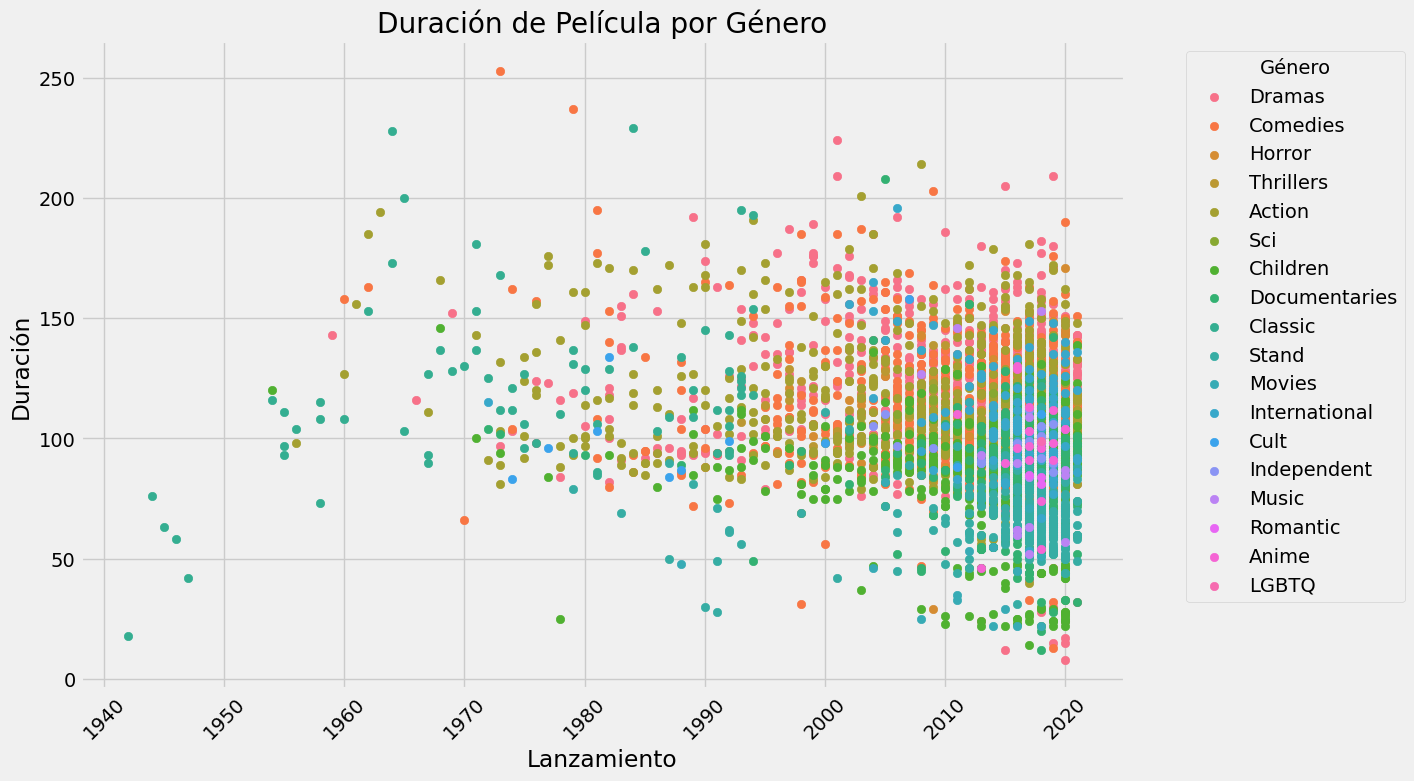

In [ ]:
plt.style.use('fivethirtyeight')

palette = sns.color_palette("husl", len(copiadf['genres'].unique()))

plt.figure(figsize=(12, 8))
for i, genre in enumerate(copiadf['genres'].unique()):
    plt.scatter(copiadf['release_year'][copiadf['genres'] == genre],
                copiadf['duration'][copiadf['genres'] == genre],
                label=genre,
                color=palette[i])

plt.xlabel('Lanzamiento')
plt.ylabel('Duración')
plt.title('Duración de Película por Género')
plt.xticks(rotation=45)

plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

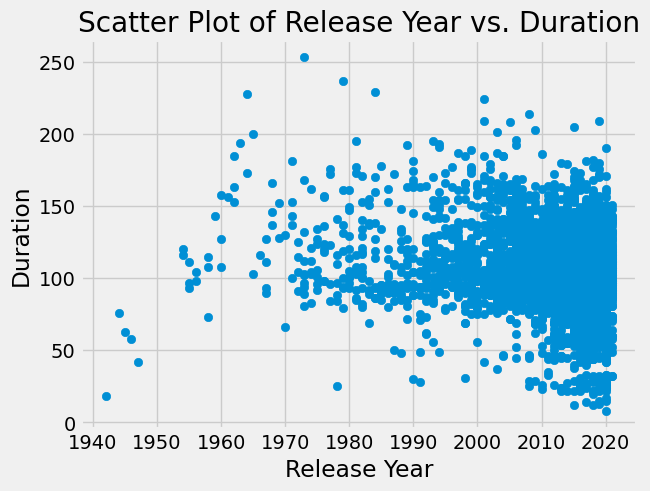

In [ ]:
plt.scatter(copiadf['release_year'], copiadf['duration'])

plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

plt.show()

In [ ]:
min_duration_index = copiadf['duration'].idxmin()

corresponding_min_release_year = copiadf.loc[min_duration_index, 'release_year']
min_duration = copiadf.loc[min_duration_index, 'duration']

print(f"La película con menos duración dura {min_duration} minutos y fue lanzada en {corresponding_min_release_year}.")

max_duration_index = copiadf['duration'].idxmax()

corresponding_max_release_year = copiadf.loc[max_duration_index, 'release_year']
max_duration = copiadf.loc[max_duration_index, 'duration']

print(f"La película con más duración dura {max_duration} minutos y fue lanzada en {corresponding_max_release_year}.")

La película con menos duración dura 8 minutos y fue lanzada en 2020.
La película con más duración dura 253 minutos y fue lanzada en 1973.


In [ ]:
netflix_type = netflix[["type"]]
netflix.dropna(inplace= True)
netflix_enc3 = OneHotEncoder(sparse=False)
housing_netflix_3hot = netflix_enc3.fit_transform(netflix_type)

netflix.reset_index(drop=False, inplace=True)
netflix=netflix.join(pd.DataFrame(housing_netflix_3hot, columns=[net for net in netflix_enc3.categories_[0]]))
netflix=netflix.drop(["type"], axis=1)

netflix.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Index(['index', 'show_id', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'Movie', 'TV Show'],
      dtype='object')

In [ ]:
copia_df = netflix.copy()
corr_copia = copia_df.corr()
corr_copia["release_year"].sort_values(ascending=False).head()

<ipython-input-18-9e45e8fb7436>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



release_year    1.000000
TV Show         0.078566
Movie          -0.078566
index          -0.180914
Name: release_year, dtype: float64

In [ ]:
top_10_countries = netflix.groupby(['country', 'Movie'])['country'].value_counts().sort_values(ascending = False).iloc[0:10]
top_10_countries

country         Movie  country       
United States   1.0    United States     1819
India           1.0    India              868
United Kingdom  1.0    United Kingdom     164
Canada          1.0    Canada             104
Egypt           1.0    Egypt               90
Spain           1.0    Spain               84
Nigeria         1.0    Nigeria             84
Indonesia       1.0    Indonesia           76
Turkey          1.0    Turkey              74
Philippines     1.0    Philippines         73
Name: country, dtype: int64

In [ ]:
top_10_movies_years = netflix.groupby(['release_year', 'Movie'])['release_year'].value_counts().sort_values(ascending = False).iloc[0:10]
top_10_movies_years

release_year  Movie  release_year
2017          1.0    2017            640
2018          1.0    2018            632
2016          1.0    2016            567
2019          1.0    2019            495
2020          1.0    2020            409
2015          1.0    2015            340
2014          1.0    2014            234
2013          1.0    2013            195
2012          1.0    2012            159
2021          1.0    2021            146
Name: release_year, dtype: int64

In [ ]:
top_10_TV_Show_durations = netflix.groupby(['duration', 'Movie'])['duration'].value_counts().sort_values(ascending = False).iloc[0:10]
top_10_TV_Show_durations

duration  Movie  duration
94 min    1.0    94 min      135
93 min    1.0    93 min      130
97 min    1.0    97 min      129
95 min    1.0    95 min      127
90 min    1.0    90 min      123
91 min    1.0    91 min      117
102 min   1.0    102 min     112
98 min    1.0    98 min      109
96 min    1.0    96 min      109
92 min    1.0    92 min      109
Name: duration, dtype: int64

In [ ]:
top_10_listed_in_movie = netflix.groupby(['listed_in', 'Movie'])['listed_in'].value_counts().sort_values(ascending = False).iloc[0:10]
top_10_listed_in_movie

listed_in                                         Movie  listed_in                                       
Dramas, International Movies                      1.0    Dramas, International Movies                        336
Stand-Up Comedy                                   1.0    Stand-Up Comedy                                     286
Comedies, Dramas, International Movies            1.0    Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies  1.0    Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                1.0    Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies     1.0    Dramas, International Movies, Romantic Movies       160
Documentaries                                     1.0    Documentaries                                       156
Comedies, International Movies                    1.0    Comedies, International Movies                

In [ ]:
netflix['duration_num'] = netflix['duration'].str.extract('(\d+)', expand=False).astype(float)
netflix = netflix.drop('duration', axis=1)

In [ ]:
netflix[(netflix['country']=='Spain')].groupby('director')['title'].apply(list)

director
Agustí Villaronga                                            [Uncertain Glory]
Aitor Arregi, Jon Garaño                                           [The Giant]
Alberto Rodríguez                                            [Smoke & Mirrors]
Alexis Morante               [Heroes: Silence and Rock & Roll, Camarón: The...
Alfonso Cortés-Cavanillas                                     [The Silent War]
                                                   ...                        
Yayo Herrero                                                        [The Maus]
Zoe Berriatúa                        [Up Among  The Stars, The Heroes of Evil]
Àlex Pastor, David Pastor                                       [The Occupant]
Álex de la Iglesia                                              [My Big Night]
Ángel Gómez Hernández                                           [Don’t Listen]
Name: title, Length: 82, dtype: object

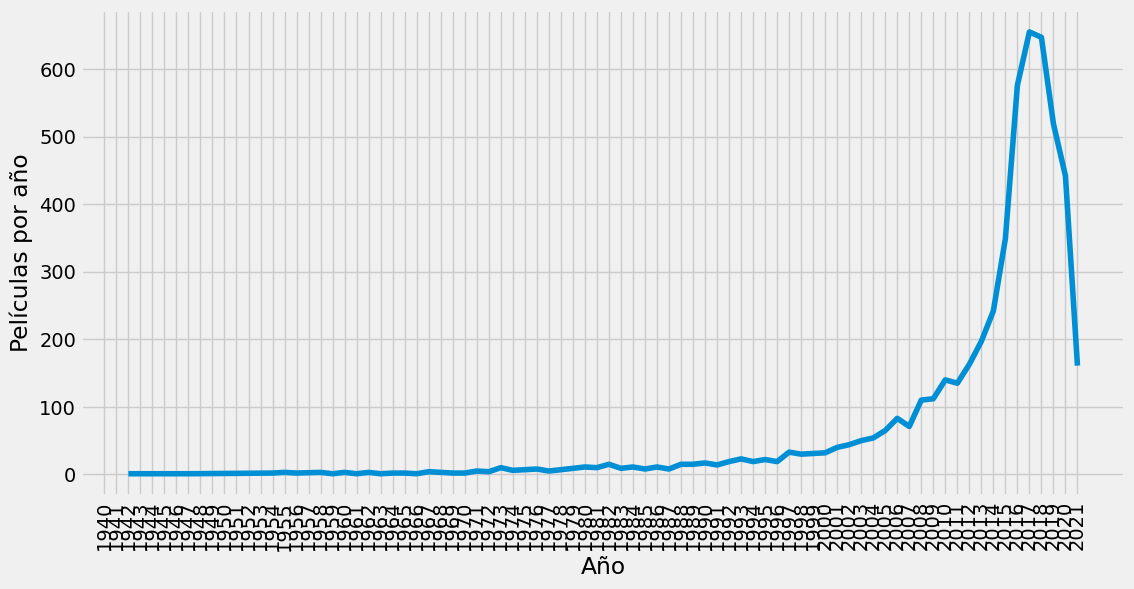

In [ ]:

df_year=netflix.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Películas por año")
plt.xlabel("Año")
plt.xticks(np.arange(1940, max(netflix['release_year'])+1, 1.0), rotation = 90)
plt.show()

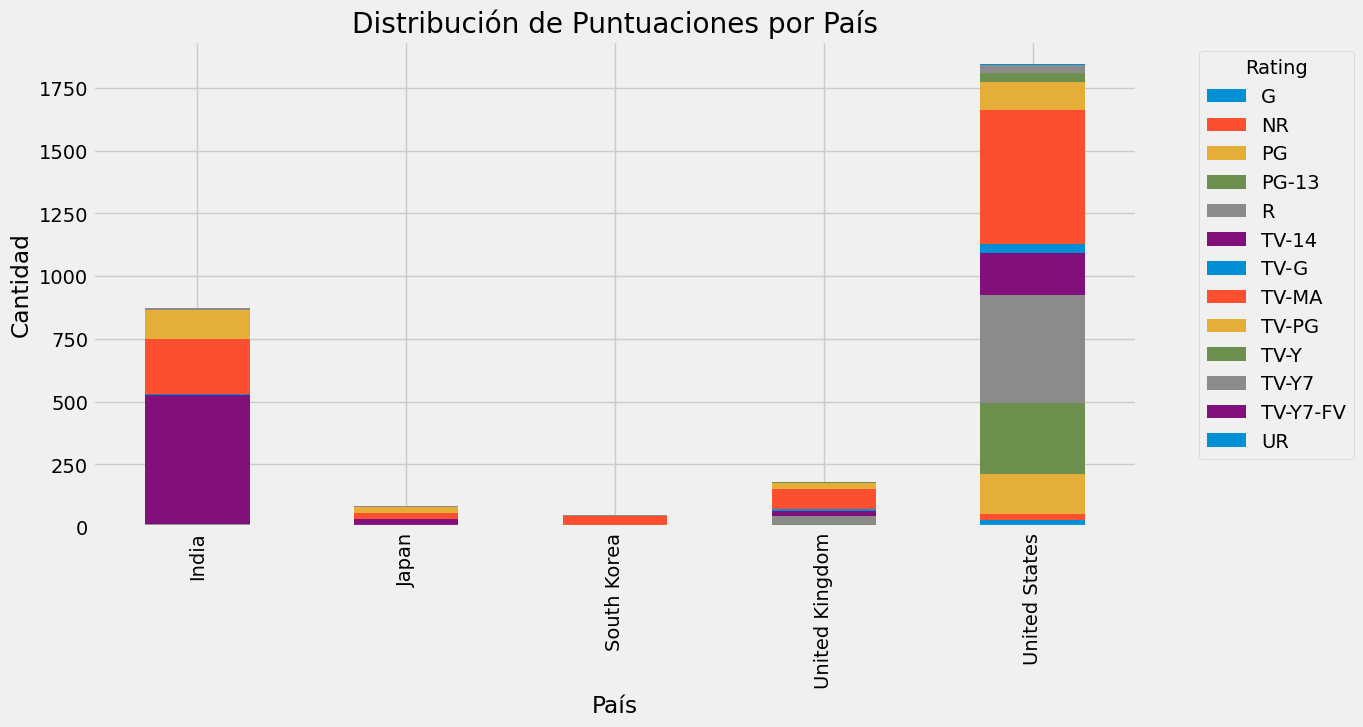

In [ ]:
countries = ['United States', 'United Kingdom', 'India', 'South Korea', 'Japan']
filtered_df = netflix[netflix['country'].isin(countries)]
rating_counts = filtered_df.groupby(['country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Puntuaciones por País')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

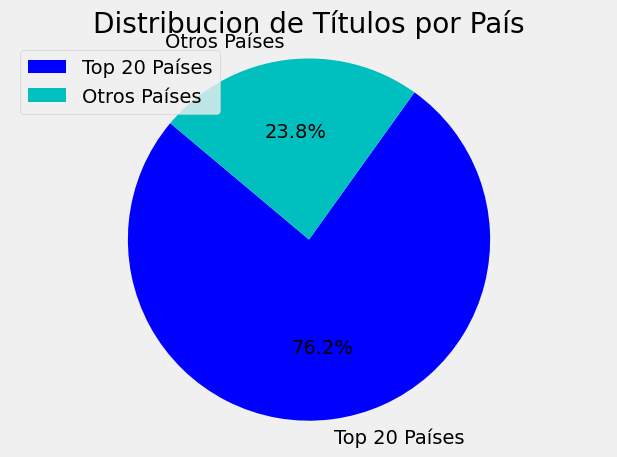

In [ ]:
top_countries = netflix['country'].value_counts().head(20)
total_titles = len(netflix)
percentage_top20 = top_countries.sum() / total_titles * 100
percentage_other = 100 - percentage_top20
labels = ['Top 20 Países', 'Otros Países']
values = [percentage_top20, percentage_other]
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
       colors = ['b' , 'c'])
plt.title('Distribucion de Títulos por País')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x800 with 0 Axes>

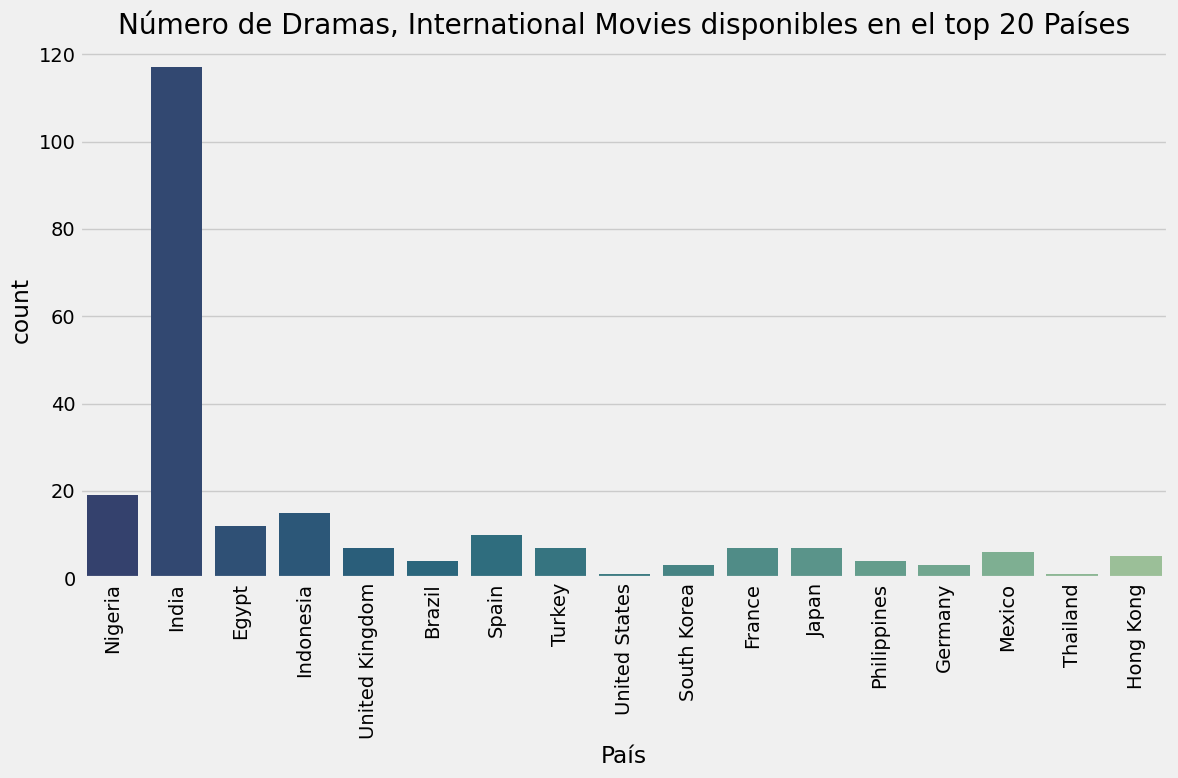

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




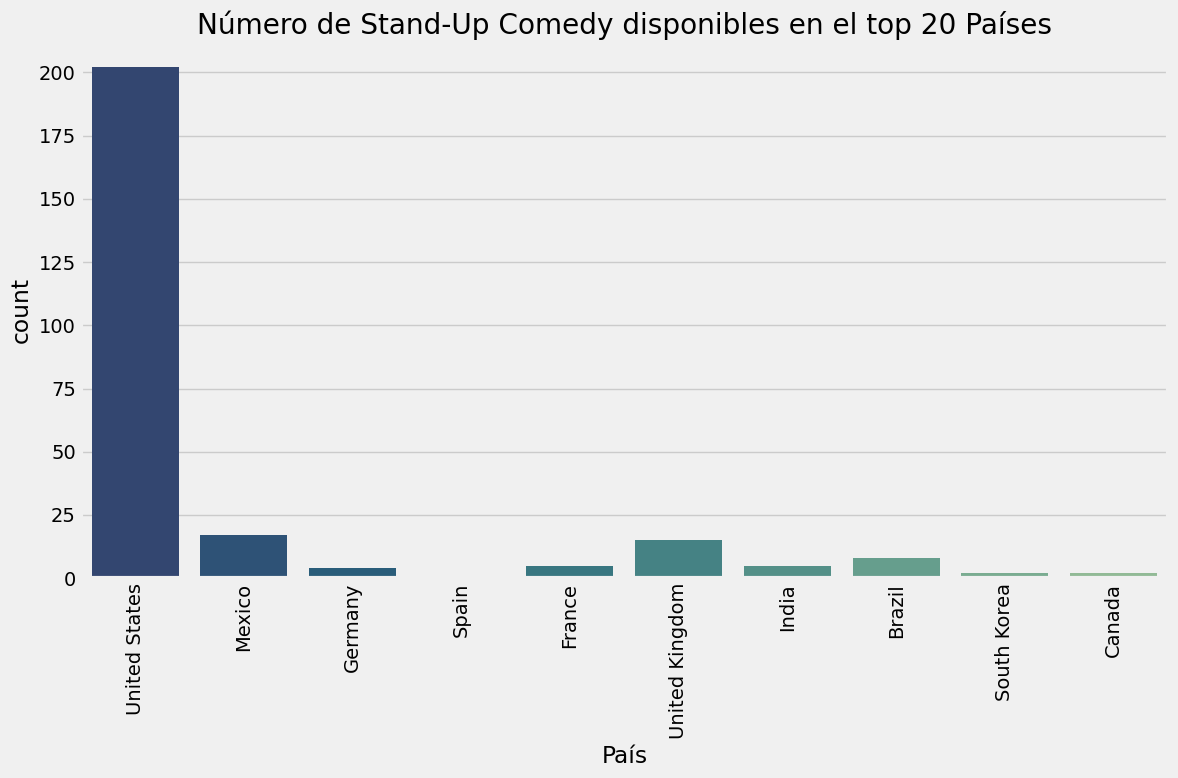

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




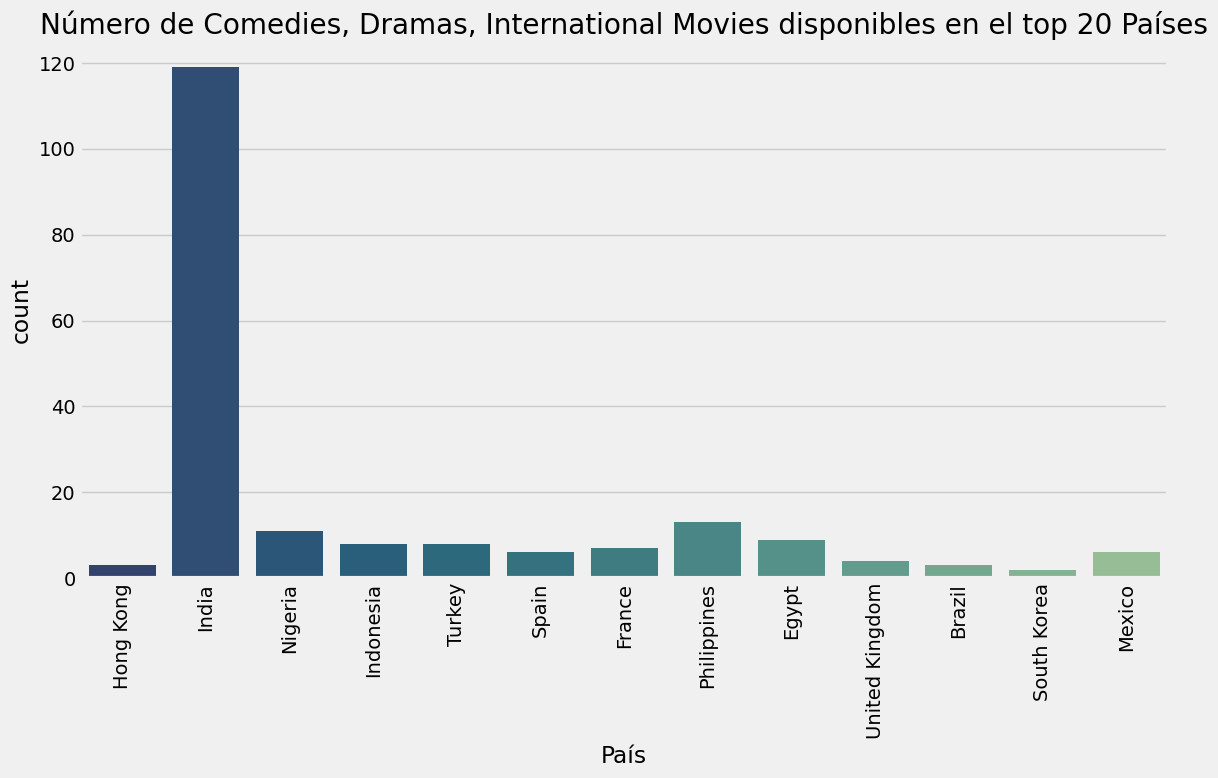

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




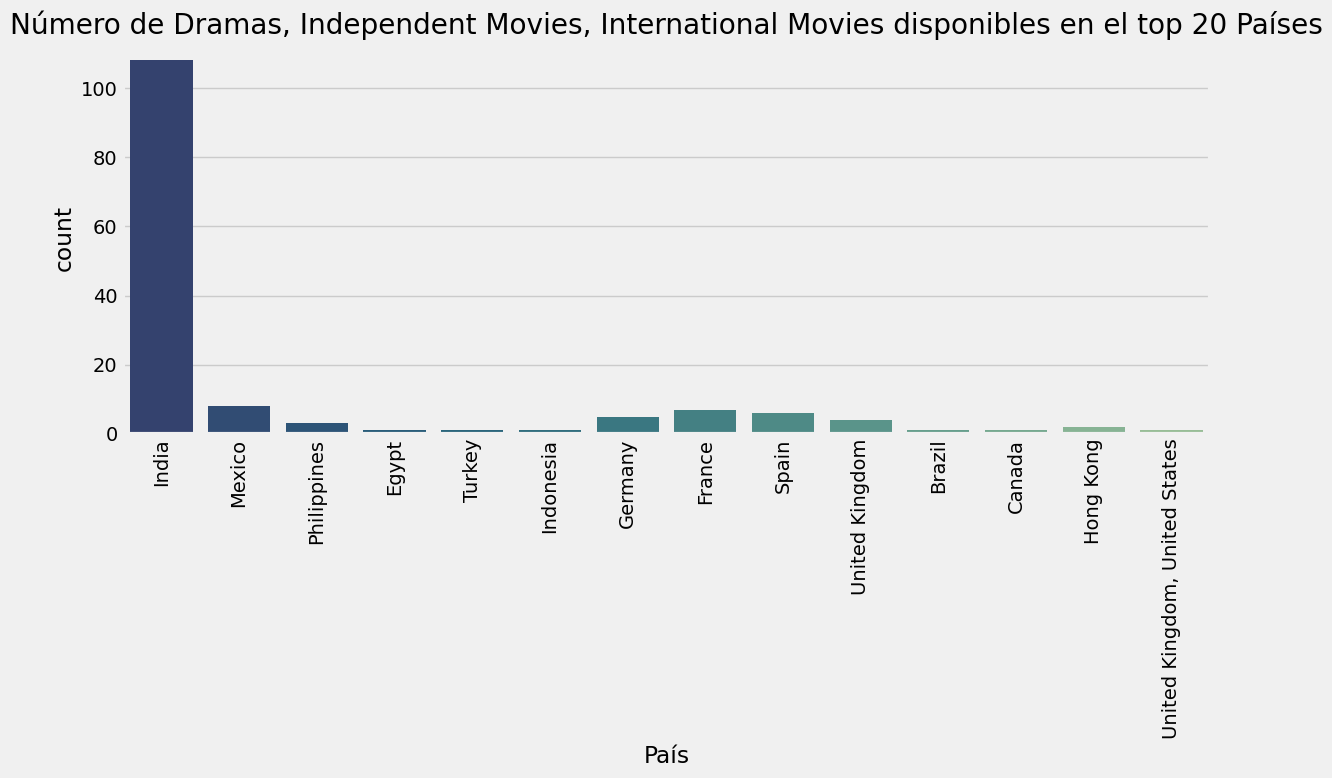

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




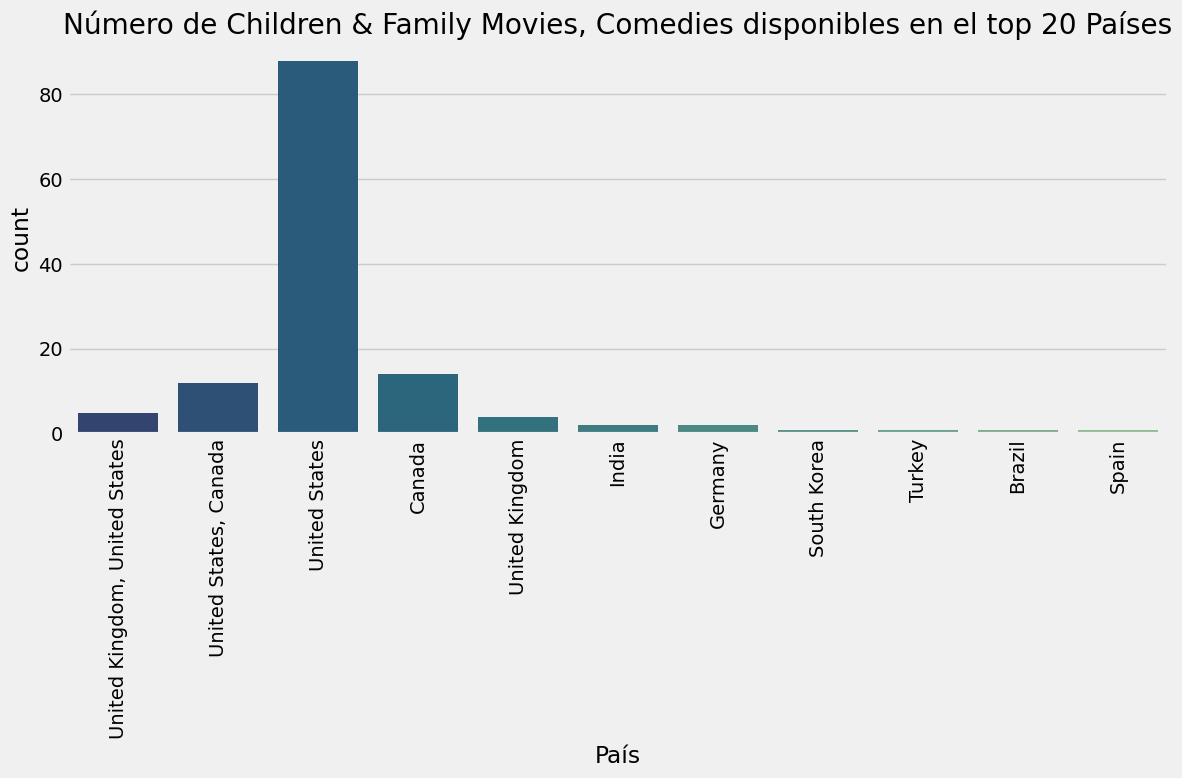

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




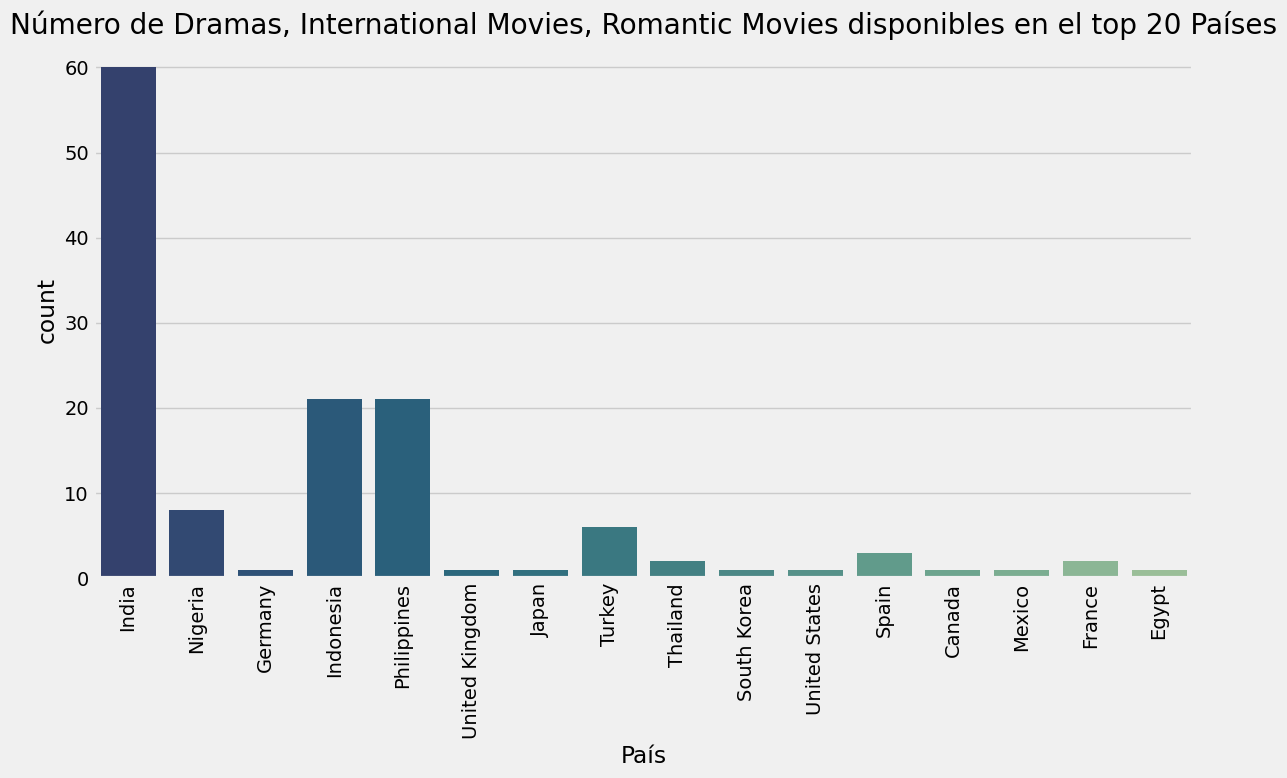

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




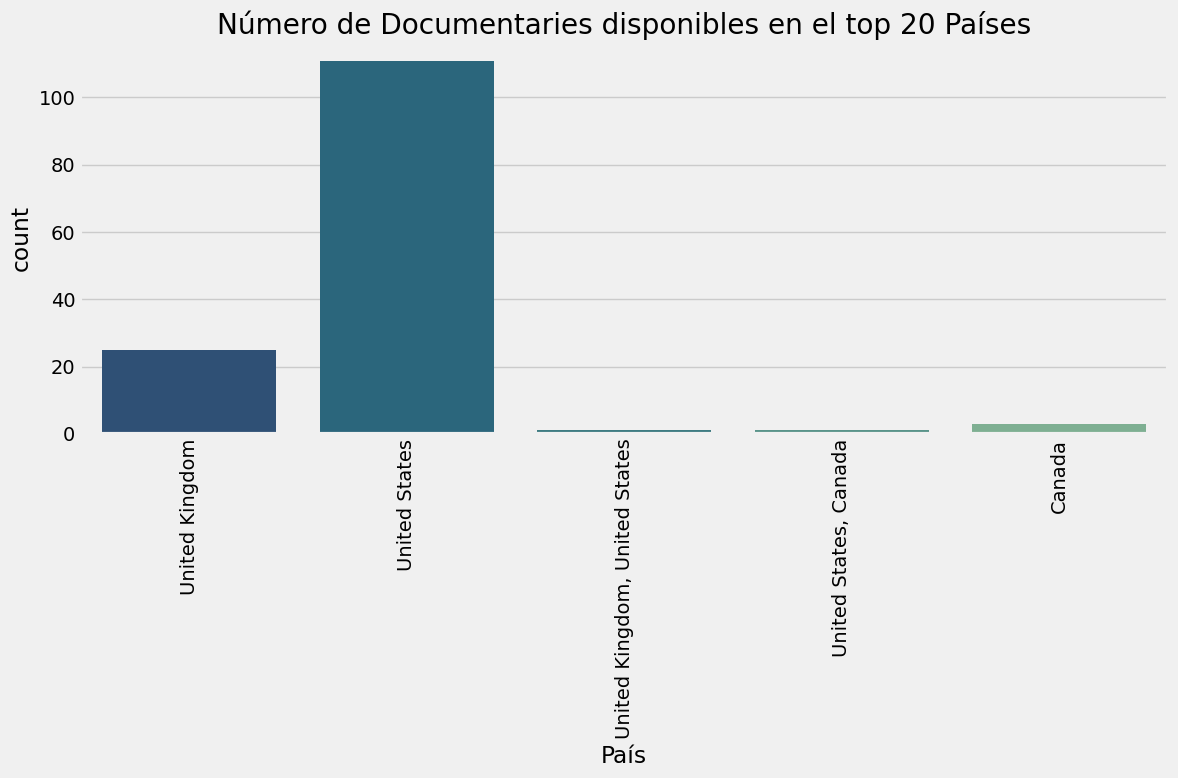

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




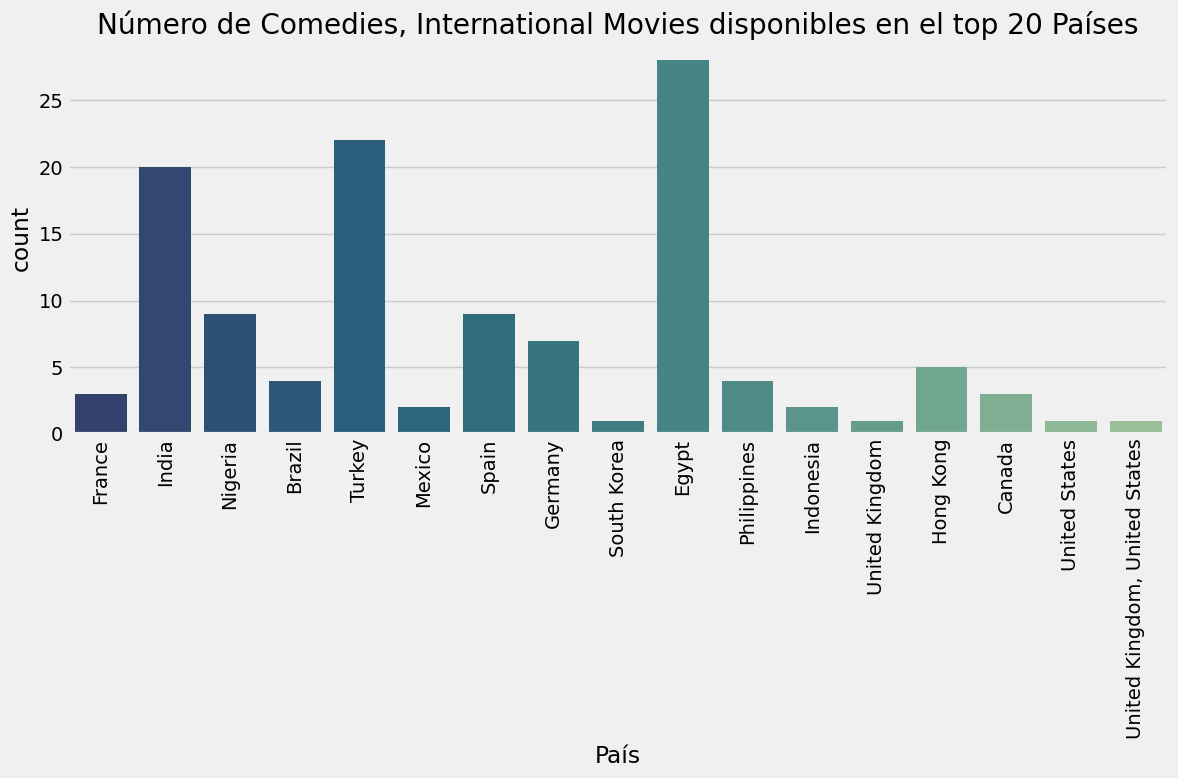

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




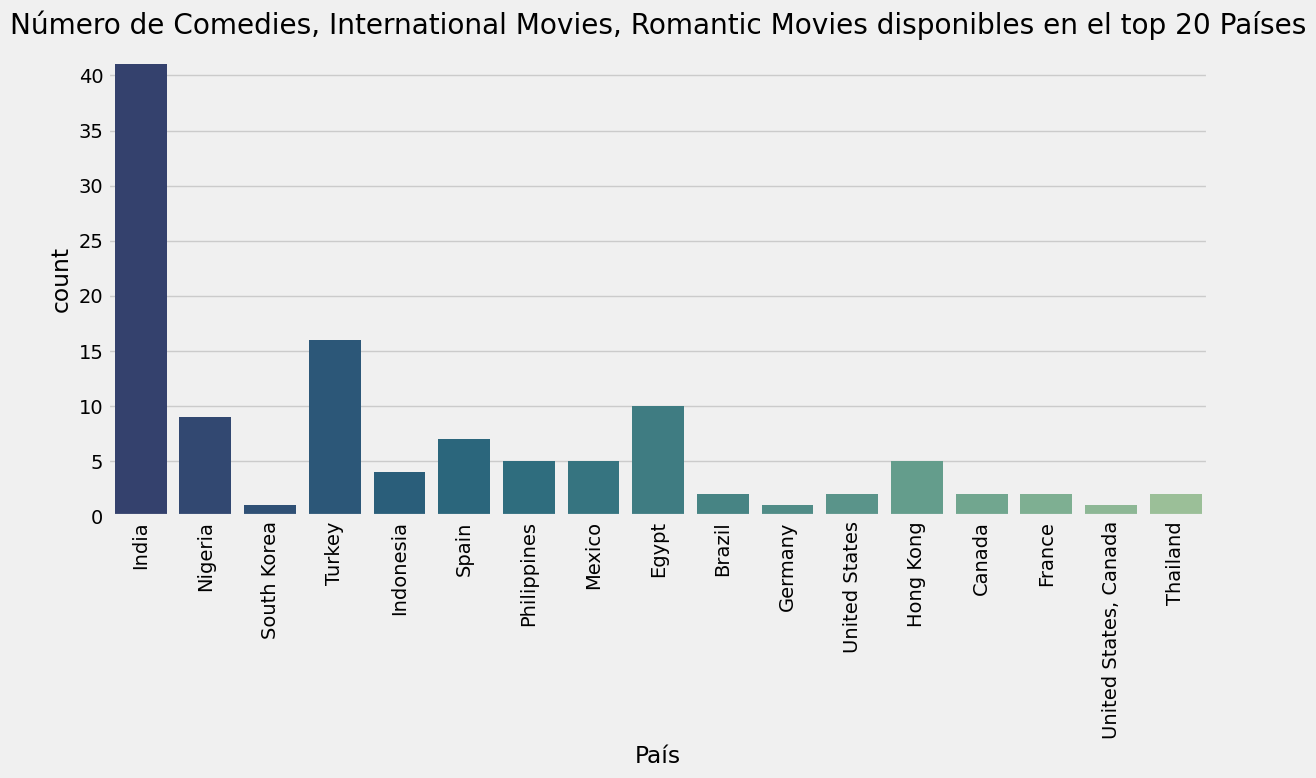

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




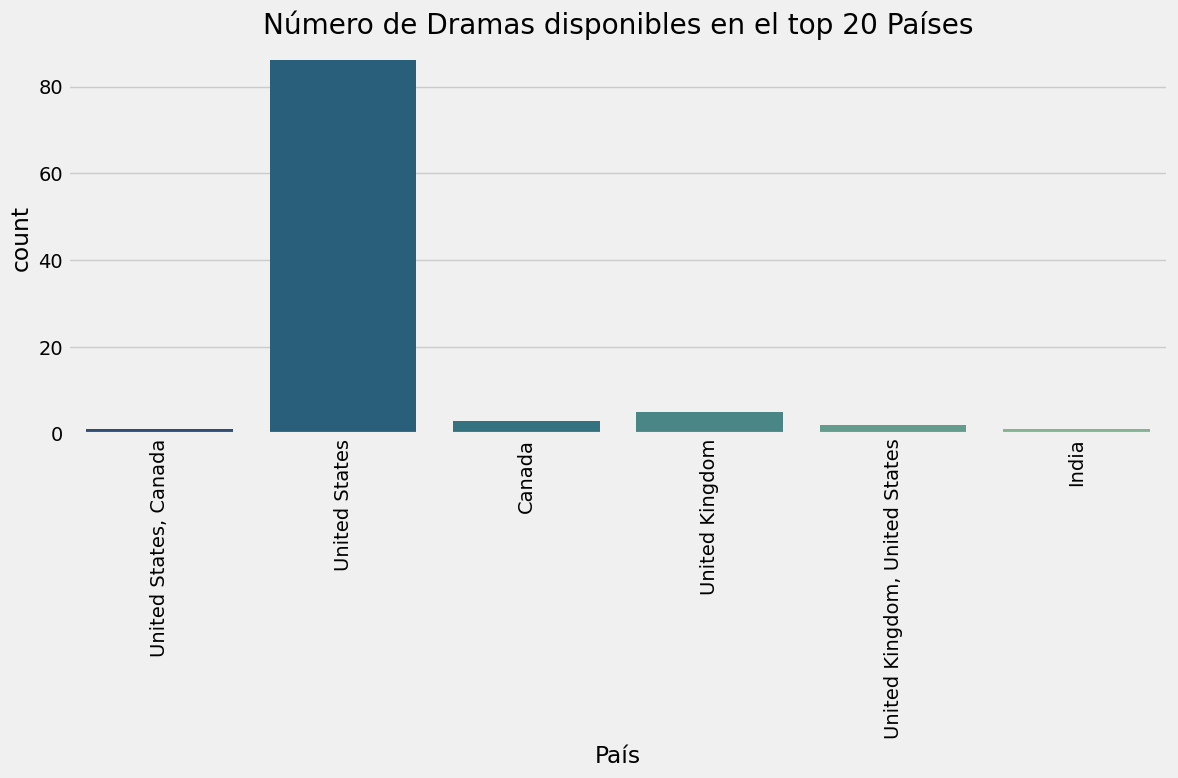

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




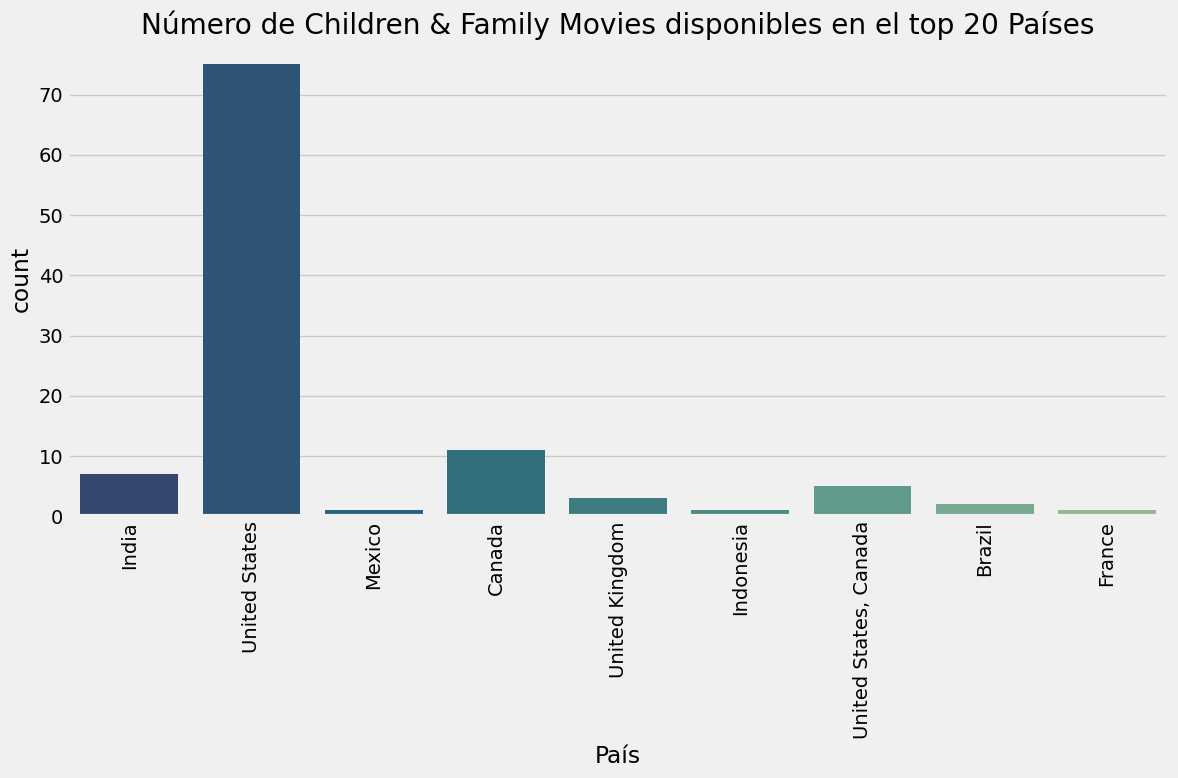

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




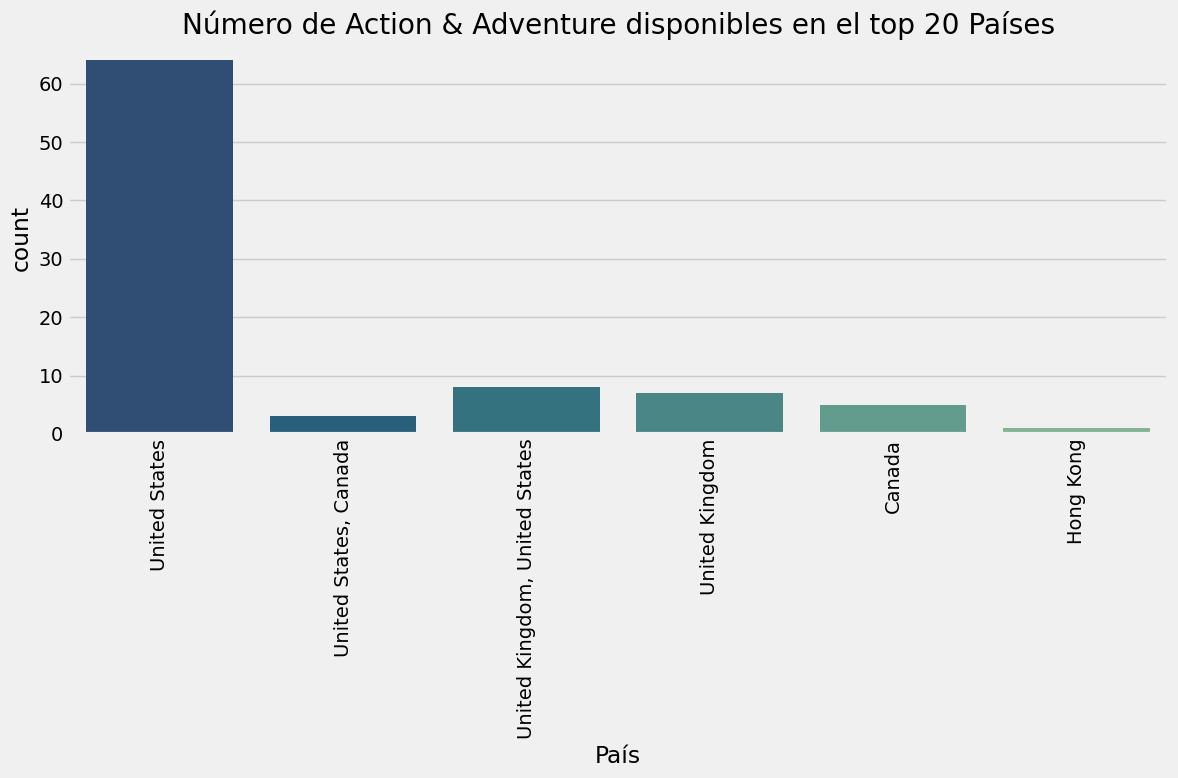

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




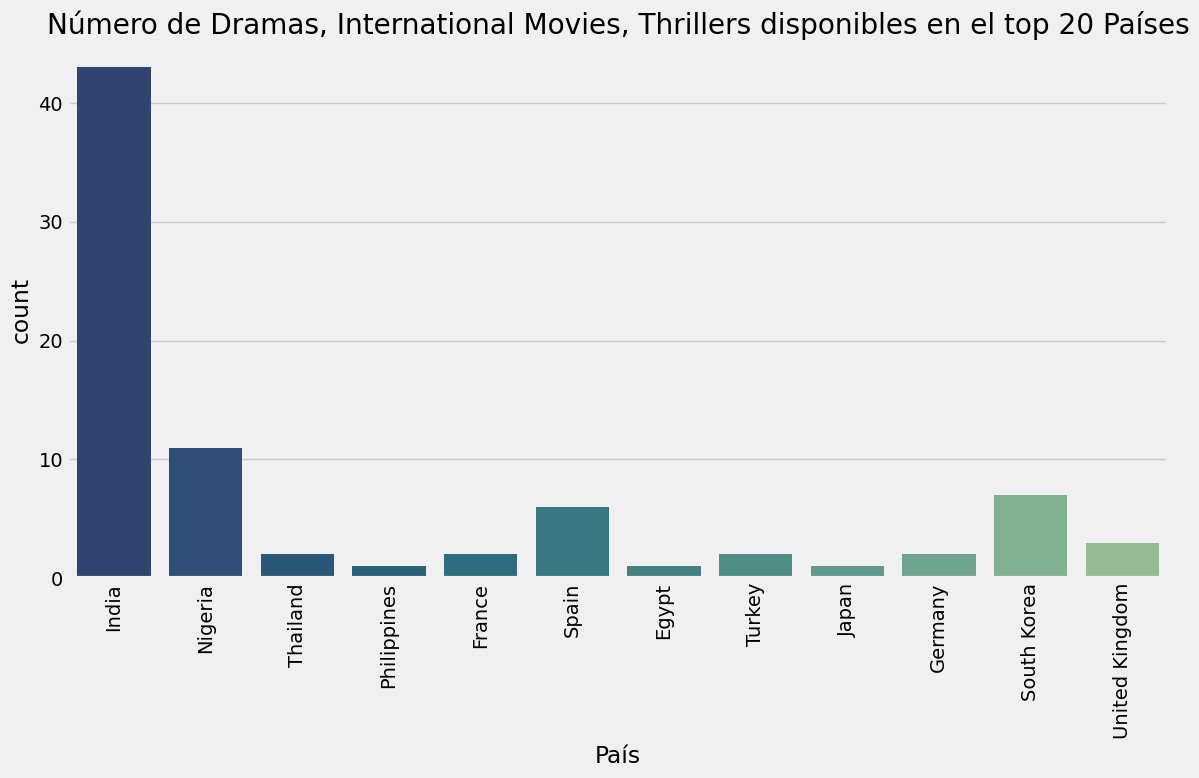

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




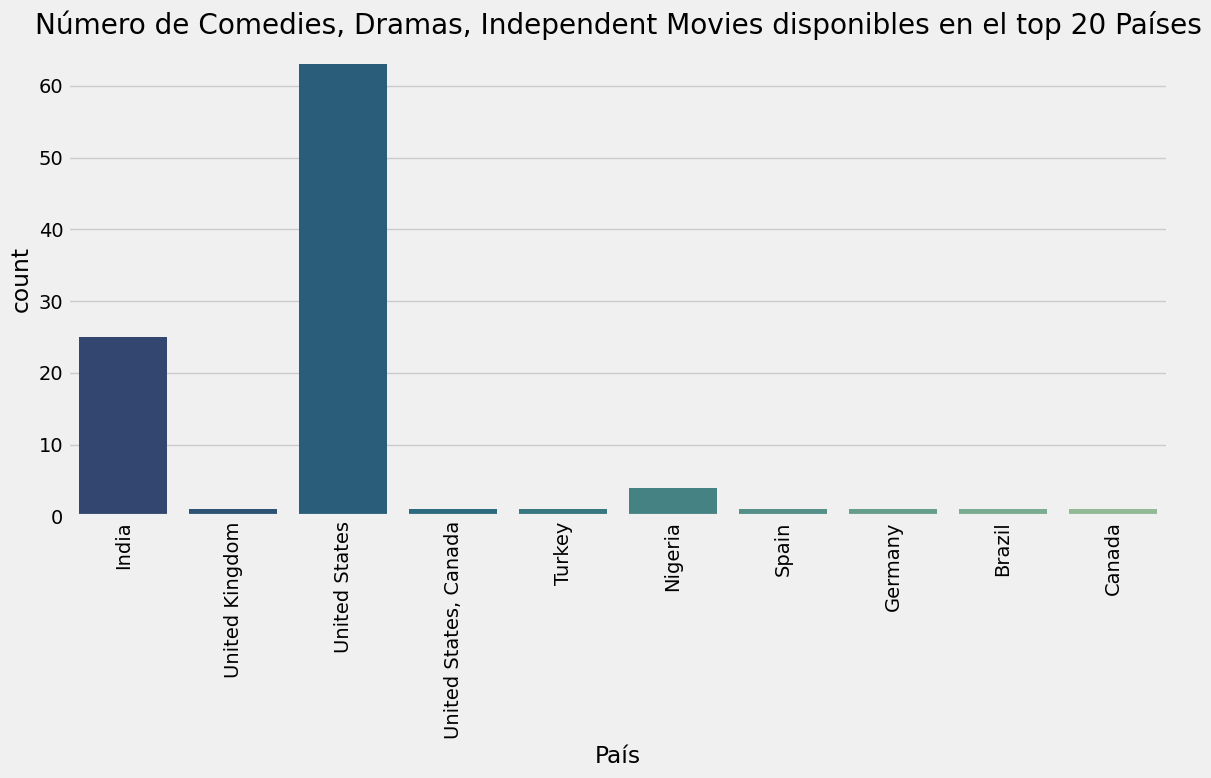

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




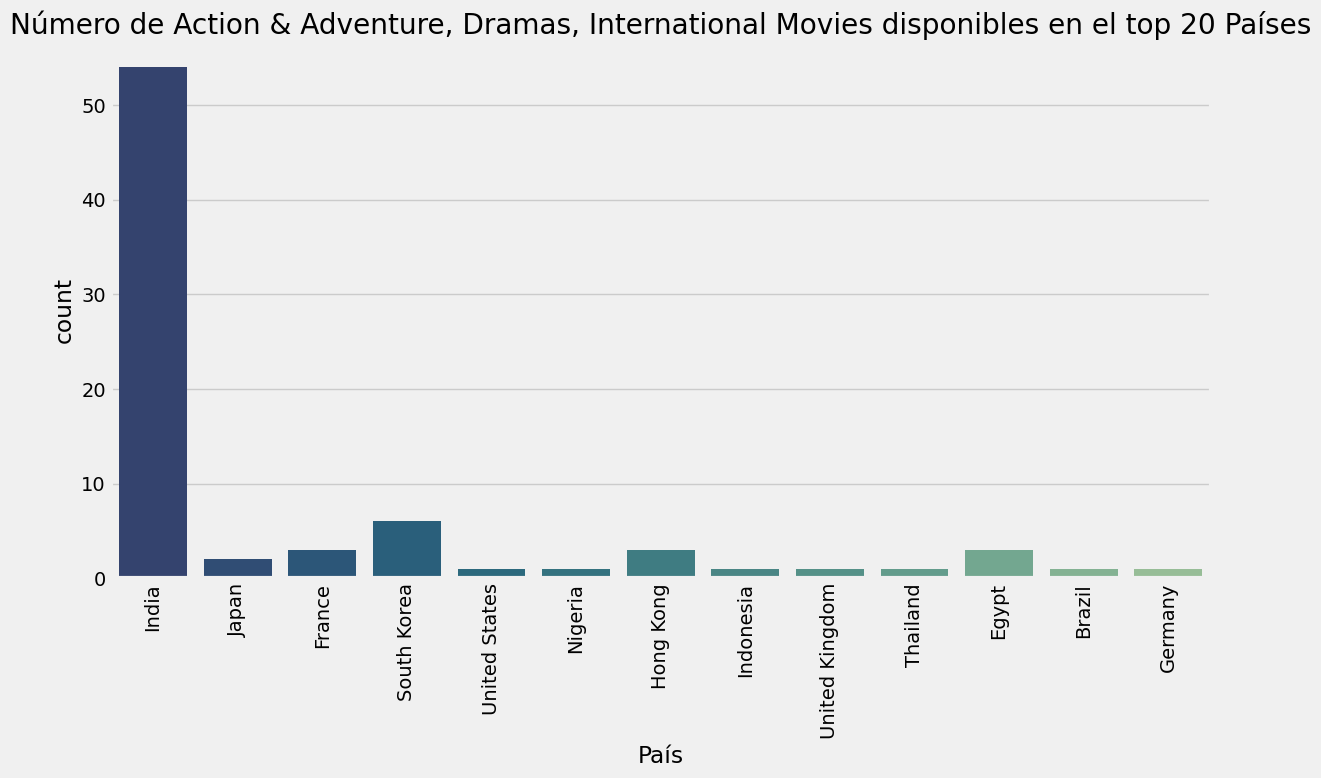

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




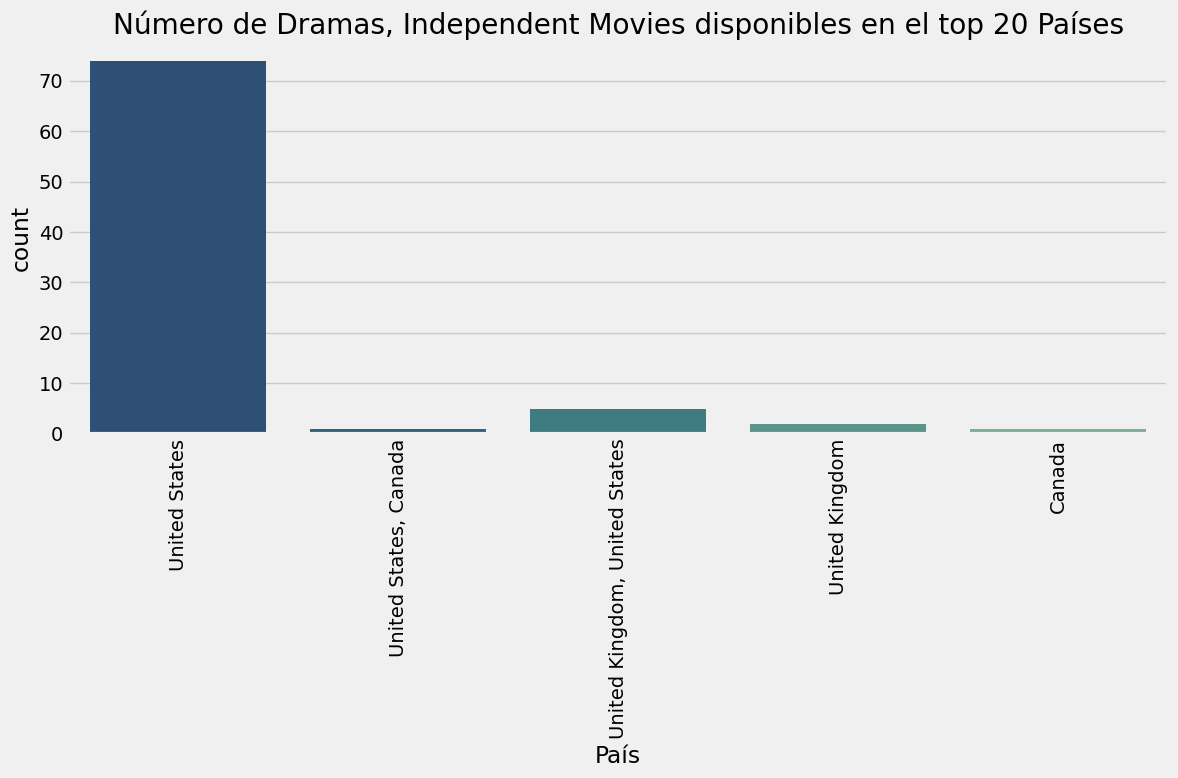

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




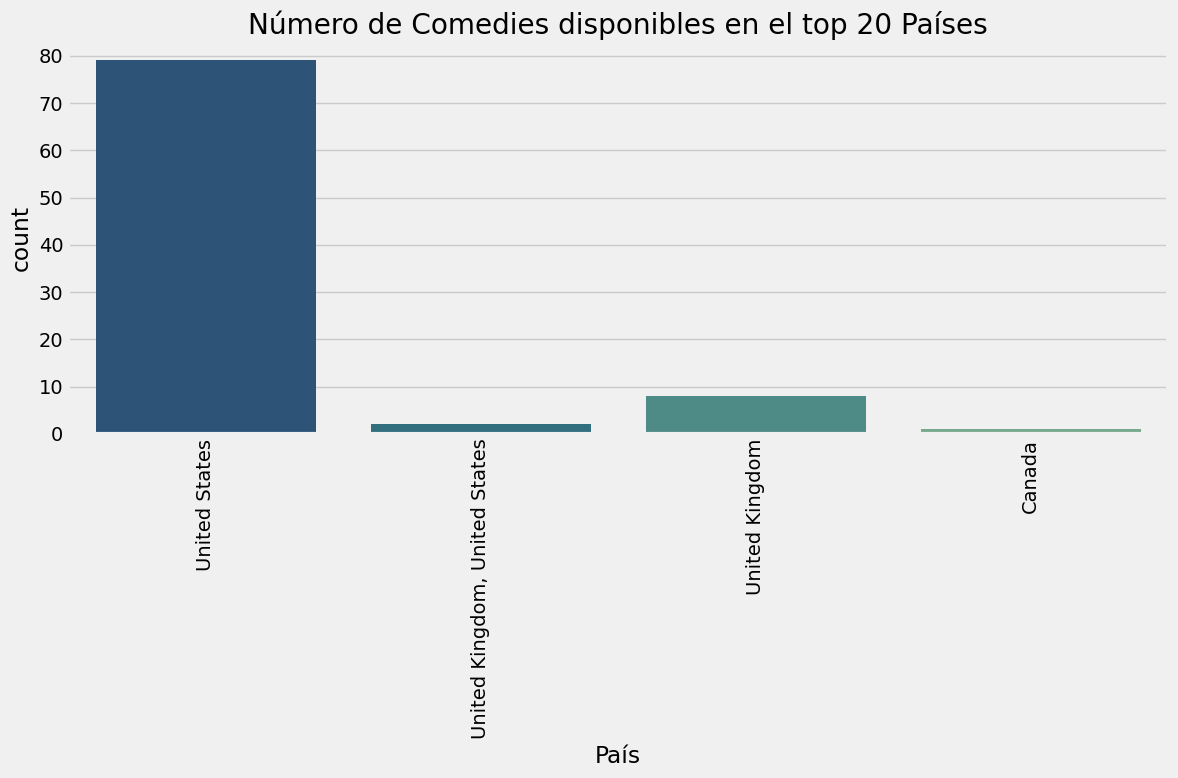

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




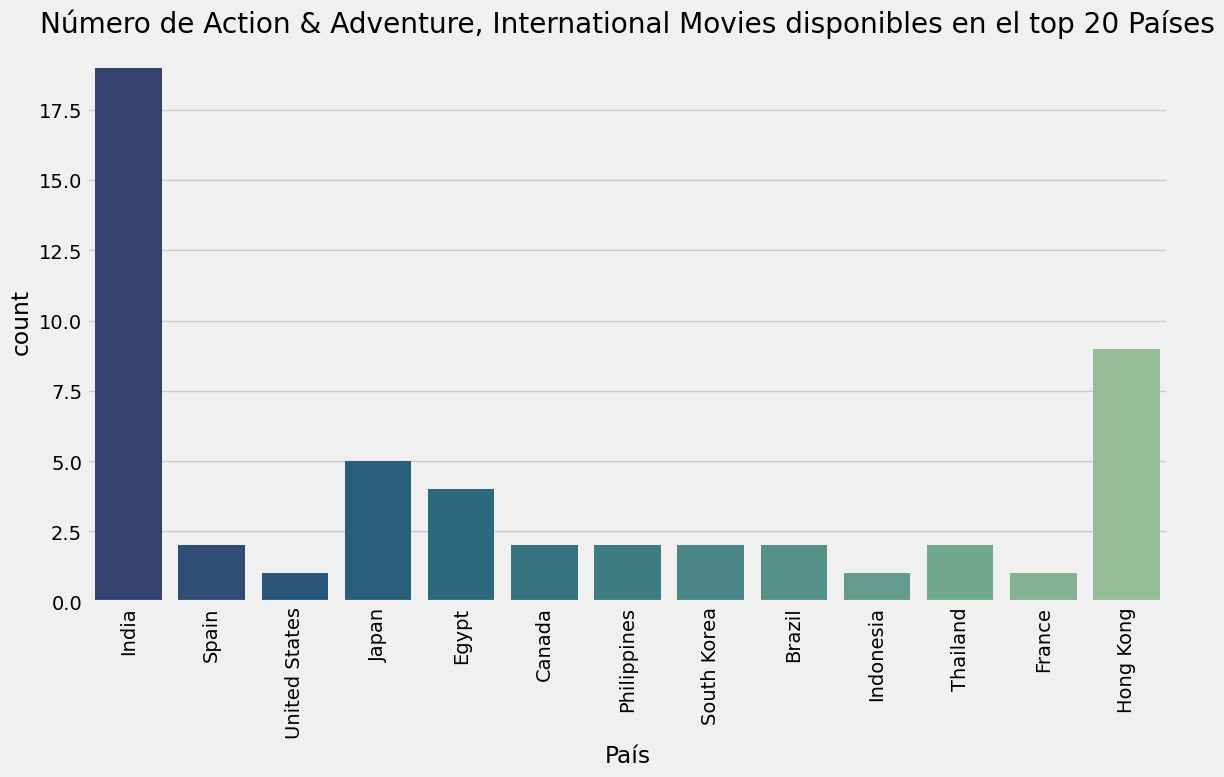

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




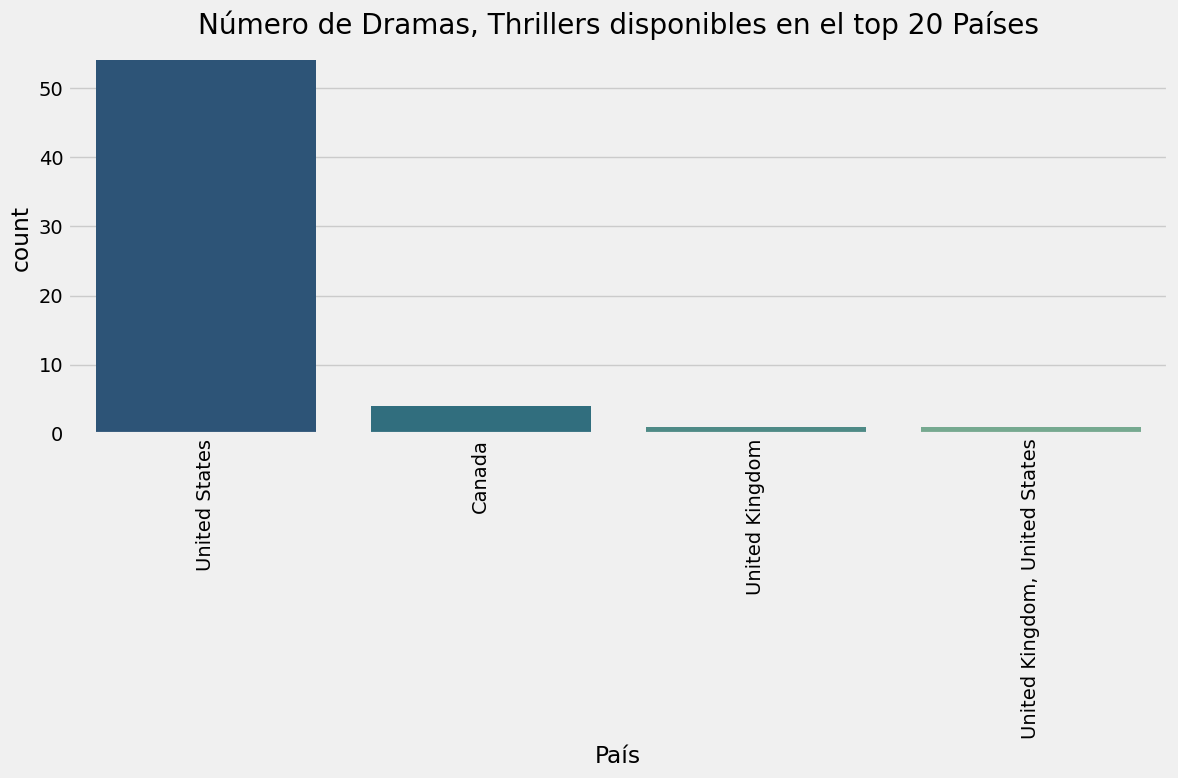

<ipython-input-28-47ab1460d300>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




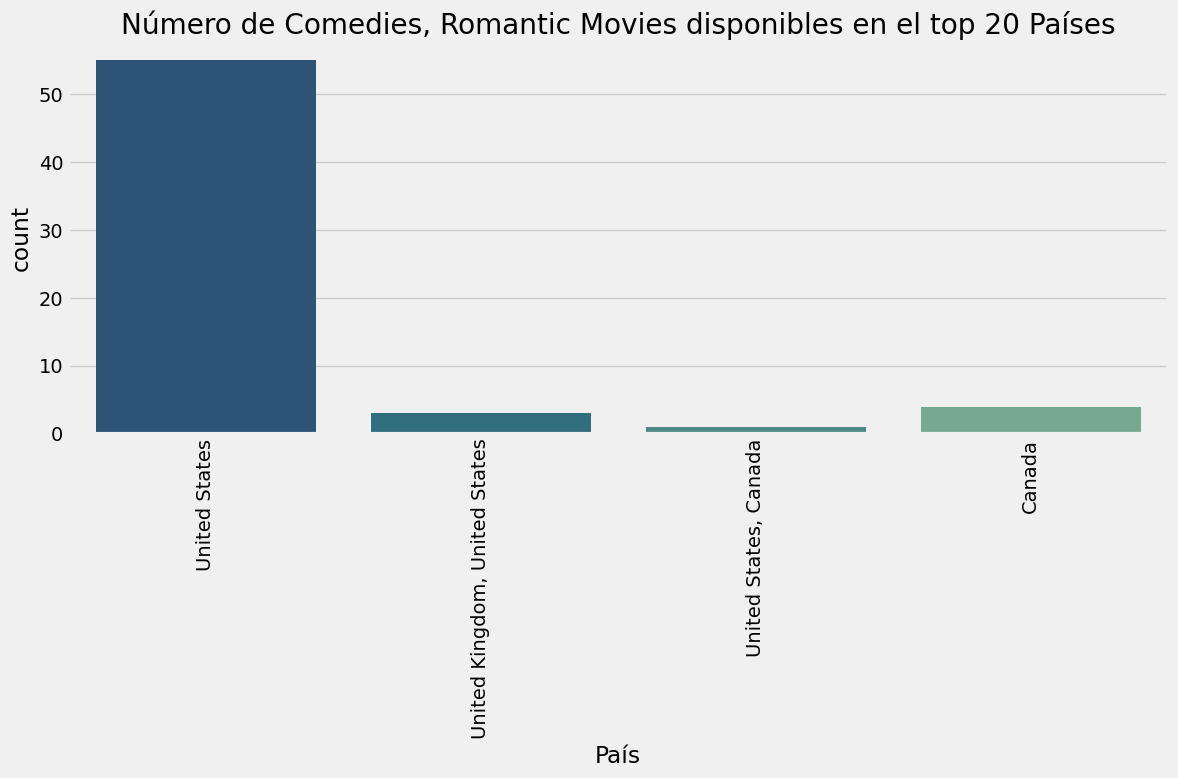

In [ ]:
plt.figure(figsize=(12, 8))
top_countries = netflix['country'].value_counts().head(20).index.tolist()
top_listed = netflix['listed_in'].value_counts().head(20).index.tolist()
for genre in top_listed:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=netflix[netflix['country'].isin(top_countries) & (netflix['listed_in'] == genre)], x='country', palette='crest_r')
    plt.title(f'Número de {genre} disponibles en el top 20 Países')
    plt.xlabel('País')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()